
# Univariate Feature Selection
- Src: Scikit Learn

Noisy (non informative) features are added to the iris data and
univariate feature selection is applied. For each feature, we plot the
p-values for the univariate feature selection and the corresponding
weights of an SVM. We can see that univariate feature selection
selects the informative features and that these have larger SVM weights.

In the total set of features, only the 4 first ones are significant. We
can see that they have the highest score with univariate feature
selection. The SVM assigns a large weight to one of these features, but also
Selects many of the non-informative features.
Applying univariate feature selection before the SVM
increases the SVM weight attributed to the significant features, and will
thus improve classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

<Figure size 432x288 with 0 Axes>

In [3]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()


Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


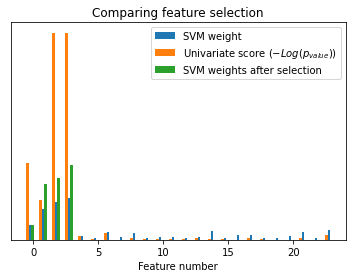

In [4]:
# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()